In [1]:
# set dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import re as re

In [2]:
# pull gdp data
raw_gdp = ".../data_cleaning/USA GDP.xlsx"
gdp = pd.read_excel(raw_gdp)
gdp.dtypes

Year    int64
GDP     int64
dtype: object

In [3]:
# pull travel expenditure data
exp_path = ".../data_cleaning/cleaned_travel_expenditures.csv"
exp = pd.read_csv(exp_path)
exp.head()

,Unnamed: 0,Date,Expenditures,Year,Month
0,0,1/1/2005,1620,2005,1
1,1,2/1/2005,1768,2005,2
2,2,3/1/2005,1844,2005,3
3,3,4/1/2005,1987,2005,4
4,4,5/1/2005,1901,2005,5


In [4]:
# collapse-sum expenditures by year
total = exp["Expenditures"].groupby(exp["Year"]).sum()
total = pd.DataFrame(total)
total.reset_index(inplace= True)
total["Expenditures"] = total["Expenditures"] * 1000000

total.dtypes

Year            int64
Expenditures    int64
dtype: object

In [5]:
# merge total yearly expenditures and yearly gdp by year
df = pd.merge(gdp, total, on = "Year")

# determine what percentage of gdp is accounted for by travel expenditures
df["% GDP Expenditures"] = round(100 * df["Expenditures"] / df["GDP"], 2)
df

,Year,GDP,Expenditures,% GDP Expenditures
0,2005,13036600000000,20658000000,0.16
1,2006,13814600000000,19929000000,0.14
2,2007,14451900000000,31436000000,0.22
3,2008,14712800000000,44882000000,0.31
4,2009,14448900000000,43053000000,0.30
5,2010,14992100000000,57948000000,0.39
6,2011,15542600000000,71185000000,0.46
7,2012,16197000000000,71090000000,0.44
8,2013,16784800000000,88352000000,0.53
9,2014,17521700000000,95432000000,0.54


best fit line:
y = -17531785375757.58 + 8751521212.12x


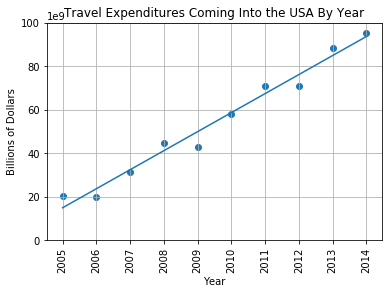

In [6]:
# plot expenditures by year
plt.scatter(df["Year"], df["Expenditures"])

plt.title("Travel Expenditures Coming Into the USA By Year")
plt.xlabel("Year")
plt.ylabel("Billions of Dollars")
plt.grid()
plt.ticklabel_format(axis='y', style='sci', scilimits=(9, 9))
plt.ylim(0, 100000000000)
plt.xticks(df["Year"], rotation = "vertical")

# define line of best fit
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(df["Year"], df["Expenditures"])

# plot points and fit line
yfit = [a + b * xi for xi in df["Year"]]
plt.plot(df["Year"], yfit)

# save graph
plt.savefig(".../graphs/travel_exp.jpeg")

best fit line:
y = -872870889696969.62 + 441911515151.52x


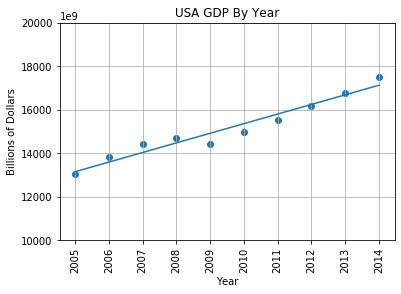

In [7]:
# plot gdp by year
plt.scatter(df["Year"], df["GDP"])

plt.title("USA GDP By Year")
plt.xlabel("Year")
plt.ylabel("Billions of Dollars")
plt.grid()
plt.ticklabel_format(axis='y', style='sci', scilimits=(9, 9))
plt.ylim(10000000000000, 20000000000000)
plt.xticks(df["Year"], rotation = "vertical")

# solution
a, b = best_fit(df["Year"], df["GDP"])

# plot points and fit line
yfit = [a + b * xi for xi in df["Year"]]
plt.plot(df["Year"], yfit)

plt.savefig(".../graphs/gdp.jpeg")

best fit line:
y = -94.52 + 0.05x


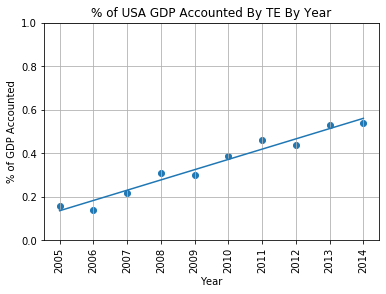

In [8]:
# plot % of gdp accounted for TE
plt.scatter(df["Year"], df["% GDP Expenditures"])

plt.title("% of USA GDP Accounted By TE By Year")
plt.xlabel("Year")
plt.ylabel("% of GDP Accounted")
plt.grid()
plt.ylim(0, 1)
plt.xticks(df["Year"], rotation = "vertical")

# solution
a, b = best_fit(df["Year"], df["% GDP Expenditures"])

# plot points and fit line
yfit = [a + b * xi for xi in df["Year"]]
plt.plot(df["Year"], yfit)

plt.savefig(".../graphs/pct_gdp.jpeg")